In [48]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import math

## Clinical analysis

In [49]:
# Assuming the CSV file is located in a folder named 'data' which is a subdirectory of the current directory
file_path = 'output_ClinicalData.csv'

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path, sep = ",", index_col = 0)
    print("CSV file successfully read.")  # Indicate successful reading
except FileNotFoundError:
    print("File not found. Please check the file path.")  # Handle file not found error

# Now you can use 'df' DataFrame for further analysis

CSV file successfully read.


In [50]:
df

,MATH,PFS_P,PFS_P_CNSR,AGE,SEX,TRT01P,PDL1FL,TCGA_cluster,HE_TUMOR_CELL_CONTENT_IN_TUMOR_AREA,CD8_INVASIVE_MARGIN_SURFACE_AREA,CD8_POSITIVE_CELLS_TUMOR_CENTER,PD-L1_TOTAL_IMMUNE_CELLS_PER_TUMOR_AREA,CD8_POSITIVE_CELLS_INVASIVE_MARGIN,CD8_POSITIVE_CELLS_TOTAL_AREA
X00936b9285d6b8665ae9122993fb8e91,17.928391,4.172485,0,52,F,Avelumab+Axitinib,0,m1,70.0,13.3235,0.08,0.0,0.65,0.1931
X105622fadc33f23755ac2df823110aca,16.122090,16.591376,1,78,M,Sunitinib,0,m1,85.0,NaN,0.12,1.0,NaN,0.1214
Xe44f39747a8e84b02b4cb24659312144,23.616637,11.104723,0,61,M,Sunitinib,1,m2,80.0,5.4150,0.92,5.0,0.92,0.9203
X293dd1284496215e9a0eca9f17a98e7e,24.817435,14.028747,1,55,M,Sunitinib,1,m2,60.0,NaN,3.16,5.0,NaN,3.1635
X01ed7190ce00862696edbf047b542045,19.303863,12.418891,0,68,M,Sunitinib,1,m1,80.0,12.6629,1.98,2.0,2.61,2.0708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X50772aa64efb859960b20f8801cd6f58,15.672304,4.271047,0,65,M,Sunitinib,0,m1,75.0,2.7143,1.10,1.0,2.90,1.1775
X91bcd3067a1a7954692d836515e04869,27.837848,2.496920,0,57,M,Sunitinib,1,m3,50.0,11.7334,4.03,1.0,3.65,3.9642
Xc7439a06ffa32b313b0ec1b987b992a2,26.606826,6.505133,1,43,M,Avelumab+Axitinib,0,m1,80.0,NaN,0.14,1.0,NaN,0.1417
X21a6043653d187f8bbead475d2f49791,17.627516,5.683778,1,79,M,Sunitinib,0,m3,70.0,NaN,3.10,0.0,NaN,3.1024


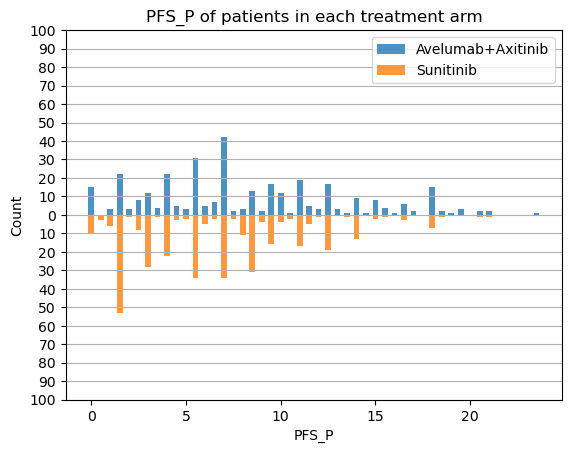

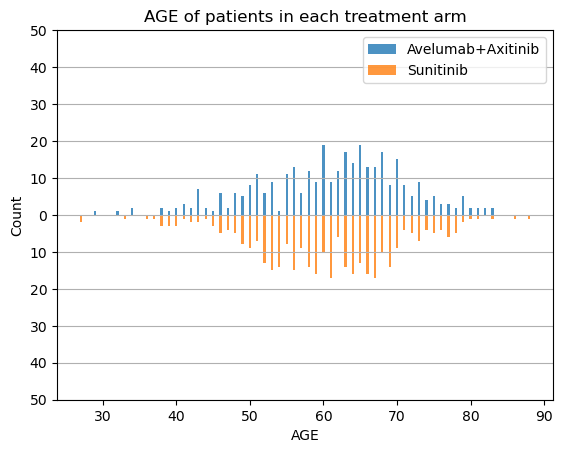

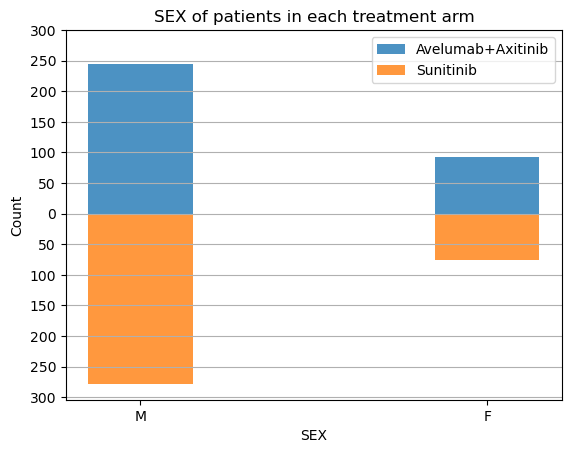

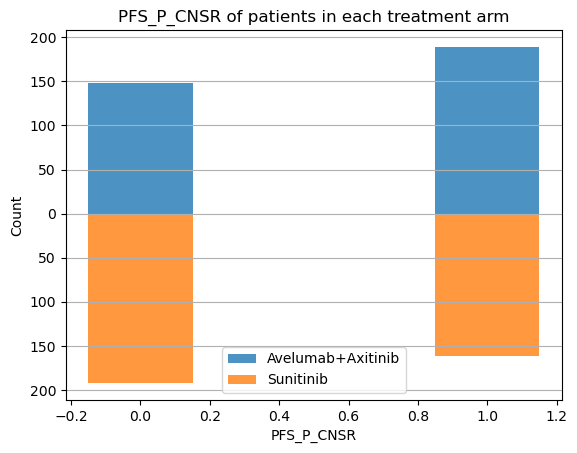

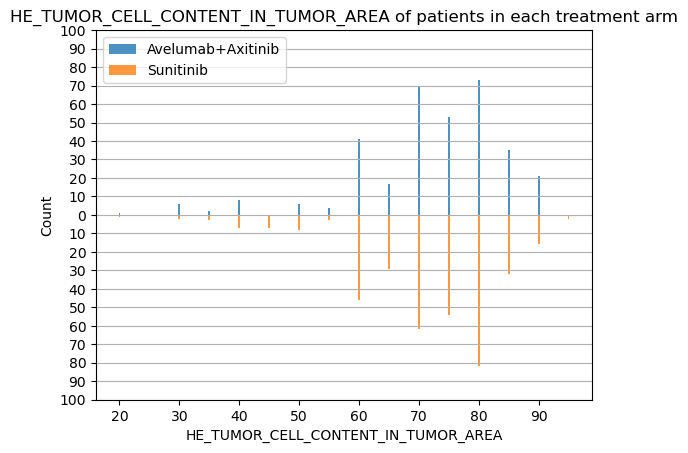

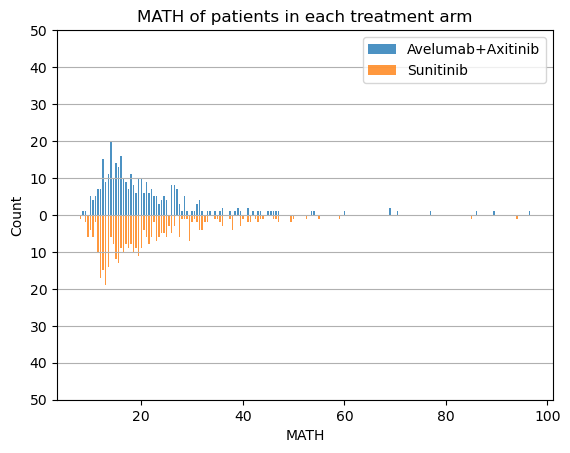

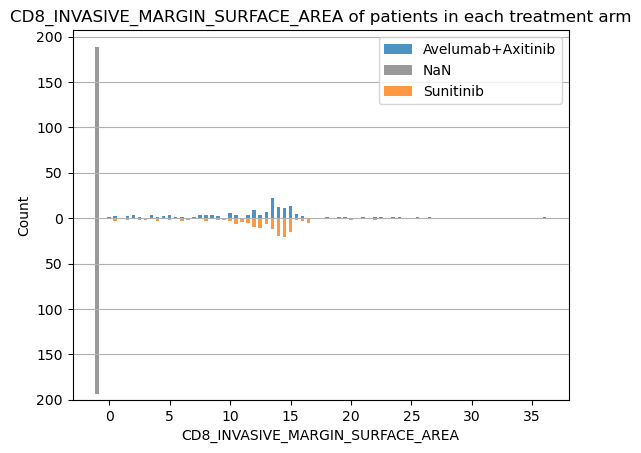

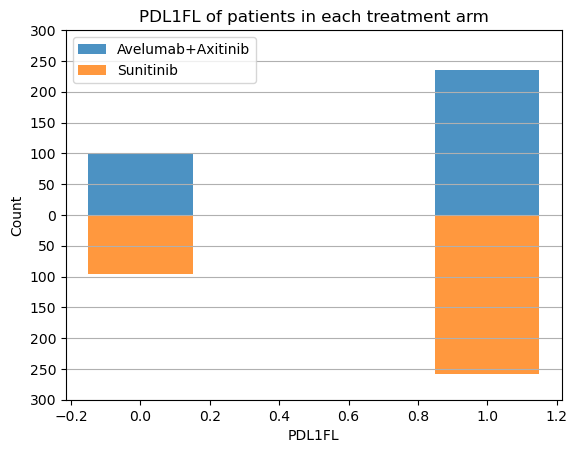

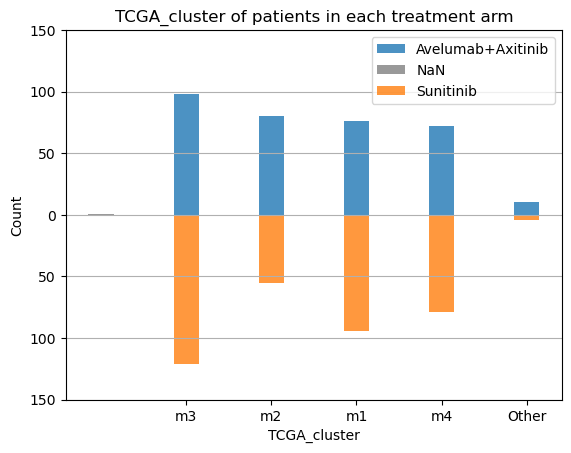

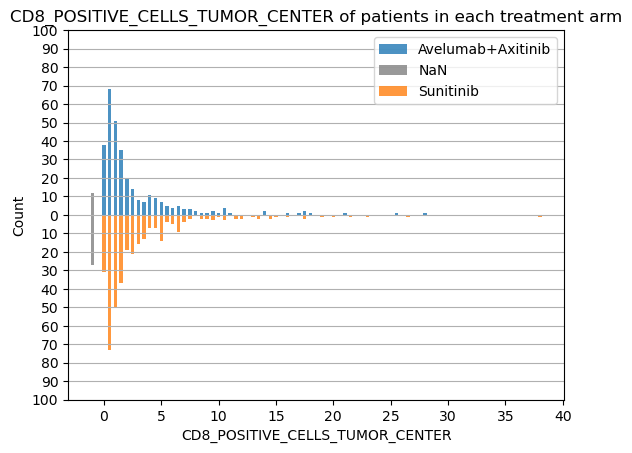

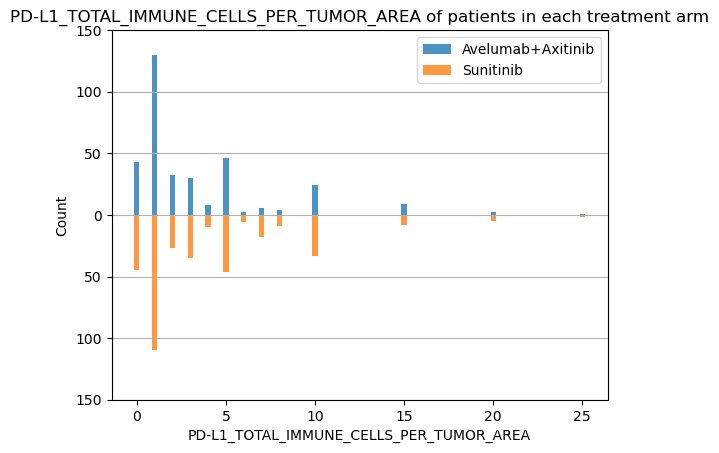

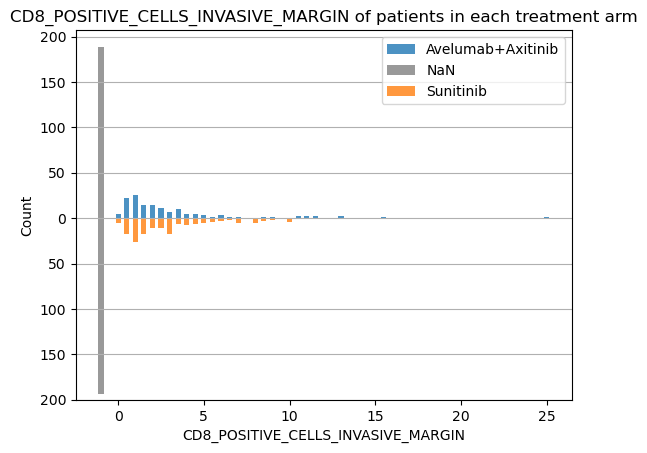

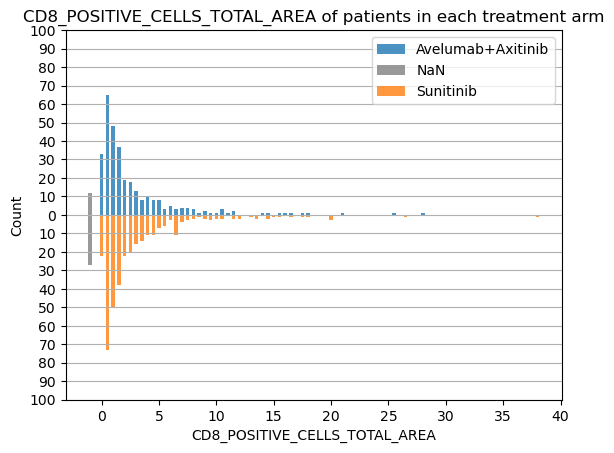

In [59]:
cohorts = [df[df['TRT01P'] == 'Avelumab+Axitinib'], 
           df[df['TRT01P'] == 'Sunitinib']]
names = ['Avelumab+Axitinib', 'Sunitinib']
biomarkers = ['PFS_P', 'AGE', 'SEX', 'PFS_P_CNSR', 'HE_TUMOR_CELL_CONTENT_IN_TUMOR_AREA', 'MATH',
              'CD8_INVASIVE_MARGIN_SURFACE_AREA', 'PDL1FL', 'TCGA_cluster', 'CD8_POSITIVE_CELLS_TUMOR_CENTER',
              'PD-L1_TOTAL_IMMUNE_CELLS_PER_TUMOR_AREA', 'CD8_POSITIVE_CELLS_INVASIVE_MARGIN',
              'CD8_POSITIVE_CELLS_TOTAL_AREA'
             ]

WIDTH = .3

for bio in biomarkers:
    maxCount = -1
    step = 1
    for idx, cohort_df in enumerate(cohorts):
        # round(x * 2) / 2 rounds to the nearest .5 => round(2.4 * 2) / 2 = round(4.8) / 2 = 5 / 2 = 2.5
        rounded_list = None

        nan_values = cohort_df[bio].isna().sum()
        
        values = cohort_df[bio].dropna().values
        if len(set(values)) > 10:
            rounded_list = pd.array([round(x * 2) / 2 for x in values])
        else:
            rounded_list = pd.array([x for x in values])
            
        counts = rounded_list.value_counts()
        
        keys = counts.keys()
        values = counts.values


        
        if (max(max(values),nan_values) > maxCount):
            maxCount = (max(max(values),nan_values) + 50) - (max(max(values),nan_values) % 50)
            
        if idx == 1:
            values = -values
        plt.bar(keys, values, alpha = .8, width = WIDTH, label = names[idx])
        
        # Plot gray bars for NaN values
        if nan_values > 0:
            plt.bar(-1, nan_values, alpha=.8, width= WIDTH, color='gray', label='NaN' if idx == 0 else '', bottom=-nan_values if idx == 0 else 0)

    if (maxCount > 100):
        step = 50
    else:
        step = 10
    
    plt.yticks(np.arange(-maxCount,maxCount+(step-1),step), abs(np.arange(-maxCount,maxCount+(step-1),step)))
    plt.title(bio + " of patients in each treatment arm")
    plt.xlabel(bio)
    plt.ylabel("Count")
    plt.grid(axis = 'y')
    plt.legend()
    plt.show()

In [5]:
a = df['TCGA_cluster'].fillna(-1)
a[a == -1]

X4ef84c59544ab1ec4571d9d3bc5bf20f    -1
X5662bd7ed1c9e11ee8cd047c10d281e3    -1
Name: TCGA_cluster, dtype: object

In [54]:
set(df['TCGA_cluster'])

{'Other', 'm1', 'm2', 'm3', 'm4', nan}

## Genetic analysis

In [6]:
# Assuming the CSV file is located in a folder named 'data' which is a subdirectory of the current directory
file_path = 'output_GeneticData.csv'

# Read the CSV file into a DataFrame
try:
    df_gen = pd.read_csv(file_path, sep = ",", index_col = 0)
    print("CSV file successfully read.")  # Indicate successful reading
except FileNotFoundError:
    print("File not found. Please check the file path.")  # Handle file not found error

# Now you can use 'df' DataFrame for further analysis

CSV file successfully read.


In [7]:
df_gen

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
X00936b9285d6b8665ae9122993fb8e91,2.91,2.41,4.71,10.78,2.02,0.01,0.01,7.18,0.01,6.22,...,3.18,3.96,3.82,3.83,2.86,0.01,4.12,8.23,5.45,5.26
X105622fadc33f23755ac2df823110aca,9.61,0.71,5.99,11.20,0.45,0.01,0.70,3.93,0.01,5.67,...,2.62,2.59,3.64,4.10,2.86,1.32,4.36,7.66,5.39,5.03
Xe44f39747a8e84b02b4cb24659312144,2.75,2.48,1.46,11.18,2.00,0.01,1.37,4.95,0.01,6.32,...,3.07,2.89,4.18,3.87,3.59,0.01,4.31,9.11,5.78,5.26
X293dd1284496215e9a0eca9f17a98e7e,2.17,0.69,0.01,10.89,1.57,0.01,0.49,5.14,1.62,6.36,...,3.04,3.18,4.40,3.93,3.92,0.43,4.16,8.66,6.04,5.13
X01ed7190ce00862696edbf047b542045,1.44,1.83,2.35,10.11,2.33,0.01,0.27,6.05,0.01,6.49,...,2.43,2.51,4.19,3.89,3.34,0.01,4.45,8.28,5.56,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X50772aa64efb859960b20f8801cd6f58,0.88,0.16,4.16,10.06,1.69,0.01,0.01,6.18,0.01,5.91,...,3.06,2.84,4.19,3.68,3.26,3.30,4.57,8.23,5.51,5.66
X91bcd3067a1a7954692d836515e04869,1.33,1.16,0.01,9.96,1.64,0.01,1.35,5.57,0.01,6.14,...,4.06,4.12,3.38,3.47,3.60,0.01,4.06,8.17,5.81,5.26
Xc7439a06ffa32b313b0ec1b987b992a2,1.74,0.56,1.20,8.96,0.64,0.01,0.01,5.98,0.01,6.16,...,3.01,3.77,4.44,4.30,2.92,0.21,4.34,7.93,5.10,5.02
X21a6043653d187f8bbead475d2f49791,1.80,1.55,3.14,10.25,1.69,0.01,3.23,6.59,0.01,6.18,...,3.82,4.24,4.14,3.52,3.06,0.01,4.39,9.07,5.92,5.93


In [37]:
gene_vals = [x for X in df_gen.values for x in X]

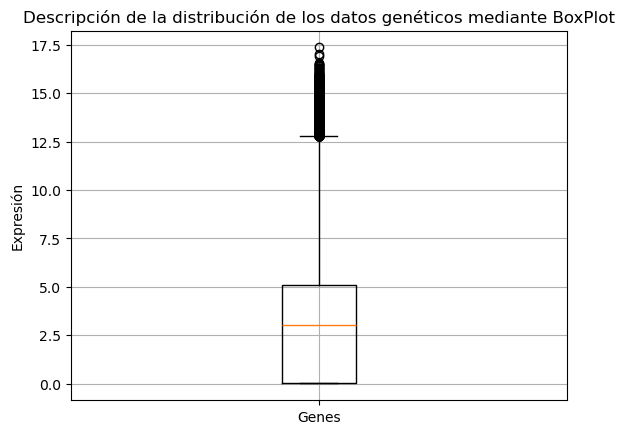

In [43]:
plt.boxplot(gene_vals)
plt.grid(True)
plt.xticks([1], labels=['Genes'])
plt.ylabel("Expresión")
plt.title("Descripción de la distribución de los datos genéticos mediante BoxPlot")
plt.show()

In [45]:
gene_vals = np.array(gene_vals)
mean_val = np.mean(gene_vals)

# Calculate standard deviation
std_val = np.std(gene_vals)

# Calculate median
median_val = np.median(gene_vals)

# Calculate minimum and maximum
min_val = np.min(gene_vals)
max_val = np.max(gene_vals)

# Print the results
print("Mean:", mean_val)
print("Standard Deviation:", std_val)
print("Median:", median_val)
print("Minimum:", min_val)
print("Maximum:", max_val)

Mean: 2.9804070116420402
Standard Deviation: 2.6330676013814065
Median: 3.01
Minimum: 0.01
Maximum: 17.36


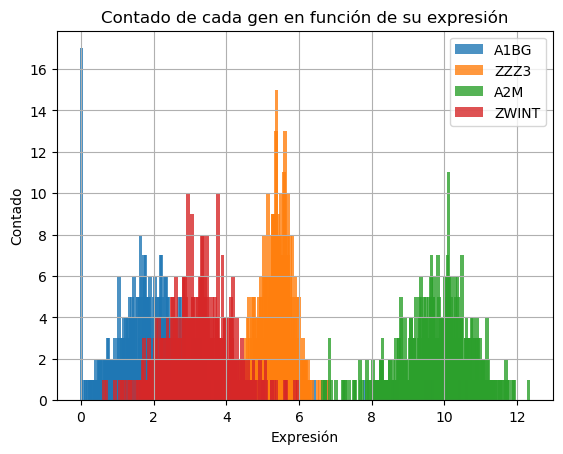

In [47]:
genes = ['A1BG', 'ZZZ3', 'A2M', 'ZWINT']

for gene in genes:
    vals = df_gen[gene].value_counts()
    keys = list(vals.keys())
    values = list(vals.values)
    plt.bar(keys,values,width = .1, label=gene, alpha = 0.8)
    plt.xlabel("Expresión")
    plt.ylabel("Contado")
    plt.title("Contado de cada gen en función de su expresión")
    plt.grid(True)
    plt.legend()

In [54]:
df

,MATH,PFS_P,PFS_P_CNSR,AGE,SEX,TRT01P,PDL1FL,TCGA_cluster,HE_TUMOR_CELL_CONTENT_IN_TUMOR_AREA,CD8_INVASIVE_MARGIN_SURFACE_AREA,CD8_POSITIVE_CELLS_TUMOR_CENTER,PD-L1_TOTAL_IMMUNE_CELLS_PER_TUMOR_AREA,CD8_POSITIVE_CELLS_INVASIVE_MARGIN,CD8_POSITIVE_CELLS_TOTAL_AREA
X00936b9285d6b8665ae9122993fb8e91,17.928391,4.172485,0,52,F,Avelumab+Axitinib,0,m1,70.0,13.3235,0.08,0.0,0.65,0.1931
X105622fadc33f23755ac2df823110aca,16.122090,16.591376,1,78,M,Sunitinib,0,m1,85.0,NaN,0.12,1.0,NaN,0.1214
Xe44f39747a8e84b02b4cb24659312144,23.616637,11.104723,0,61,M,Sunitinib,1,m2,80.0,5.4150,0.92,5.0,0.92,0.9203
X293dd1284496215e9a0eca9f17a98e7e,24.817435,14.028747,1,55,M,Sunitinib,1,m2,60.0,NaN,3.16,5.0,NaN,3.1635
X01ed7190ce00862696edbf047b542045,19.303863,12.418891,0,68,M,Sunitinib,1,m1,80.0,12.6629,1.98,2.0,2.61,2.0708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X50772aa64efb859960b20f8801cd6f58,15.672304,4.271047,0,65,M,Sunitinib,0,m1,75.0,2.7143,1.10,1.0,2.90,1.1775
X91bcd3067a1a7954692d836515e04869,27.837848,2.496920,0,57,M,Sunitinib,1,m3,50.0,11.7334,4.03,1.0,3.65,3.9642
Xc7439a06ffa32b313b0ec1b987b992a2,26.606826,6.505133,1,43,M,Avelumab+Axitinib,0,m1,80.0,NaN,0.14,1.0,NaN,0.1417
X21a6043653d187f8bbead475d2f49791,17.627516,5.683778,1,79,M,Sunitinib,0,m3,70.0,NaN,3.10,0.0,NaN,3.1024


In [55]:
# Assuming df is your DataFrame
missing_percentage = df.isnull().mean() * 100

print("Percentage of missing values in each column:")
print(missing_percentage)


Percentage of missing values in each column:
MATH                                        0.000000
PFS_P                                       0.000000
PFS_P_CNSR                                  0.000000
AGE                                         0.000000
SEX                                         0.000000
TRT01P                                      0.000000
PDL1FL                                      0.000000
TCGA_cluster                                0.289436
HE_TUMOR_CELL_CONTENT_IN_TUMOR_AREA         0.000000
CD8_INVASIVE_MARGIN_SURFACE_AREA           55.282200
CD8_POSITIVE_CELLS_TUMOR_CENTER             5.643994
PD-L1_TOTAL_IMMUNE_CELLS_PER_TUMOR_AREA     0.000000
CD8_POSITIVE_CELLS_INVASIVE_MARGIN         55.282200
CD8_POSITIVE_CELLS_TOTAL_AREA               5.643994
dtype: float64
